          size  number_of_rooms  location_score          price
0  2248.357077                7       34.815511  281464.937267
1  1930.867849                1       62.438529  222311.500185
2  2323.844269                8       48.969768  293993.455519
3  2761.514928                3       62.251323  325800.617764
4  1882.923313                6       50.379504  232744.749724
size               0
number_of_rooms    0
location_score     0
price              0
dtype: int64
              size  number_of_rooms  location_score          price
count  1000.000000      1000.000000     1000.000000    1000.000000
mean   2009.666028         5.014000       49.889568  240870.859219
std     489.607969         2.531049        9.920316   51092.762312
min     379.366330         1.000000       15.285701   91407.568017
25%    1676.204847         3.000000       43.017312  205697.841774
50%    2012.650306         5.000000       50.151991  240228.801156
75%    2323.971938         7.000000       57.008488  273

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


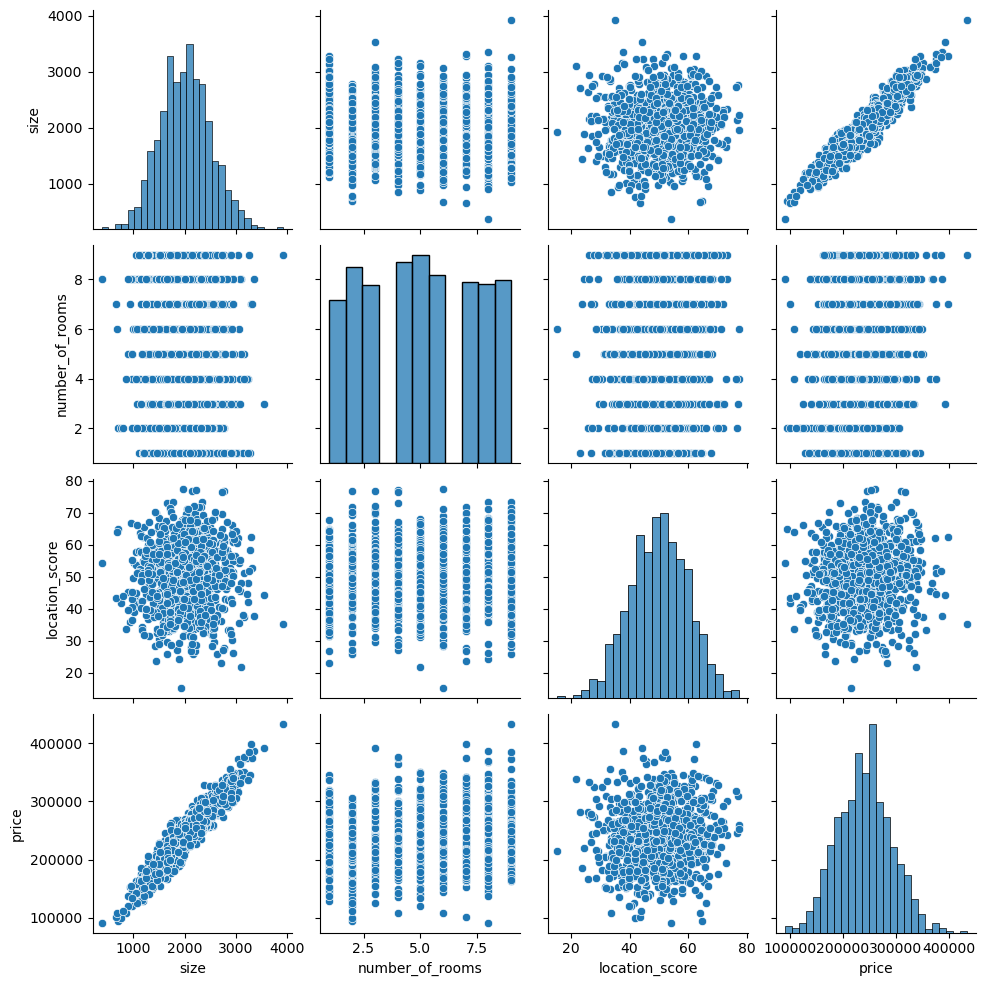

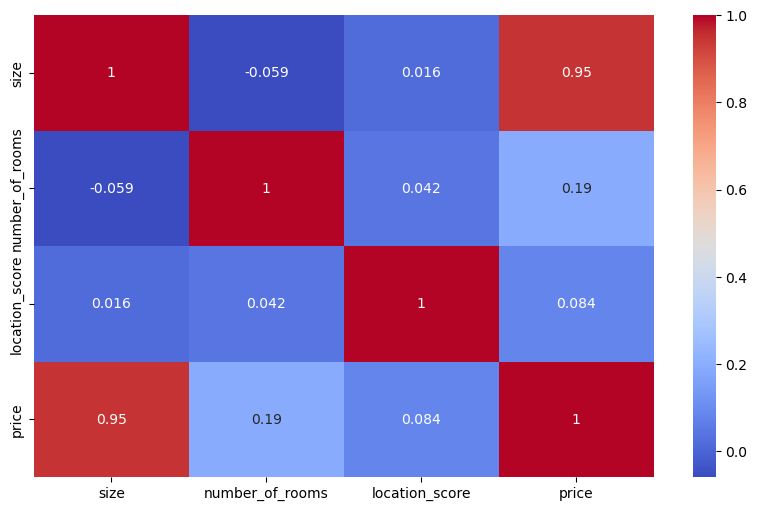

Linear Regression Model - Mean Squared Error: 96195876.56219545
Linear Regression Model - R^2 Score: 0.964451077636735
Random Forest Model - Mean Squared Error: 141920888.79653996
Random Forest Model - R^2 Score: 0.9475535247678539


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Problem Definition
# We aim to predict house prices based on various features such as size, number of rooms, and location score.

# 2. Data Analysis
# Generate synthetic dataset
np.random.seed(42)
data_size = 1000

# Features
size = np.random.normal(2000, 500, data_size)  # Size in square feet
number_of_rooms = np.random.randint(1, 10, data_size)  # Number of rooms
location_score = np.random.normal(50, 10, data_size)  # Location score

# Target variable
price = size * 100 + number_of_rooms * 5000 + location_score * 300 + np.random.normal(0, 10000, data_size)  # Price

# Create DataFrame
data = pd.DataFrame({
    'size': size,
    'number_of_rooms': number_of_rooms,
    'location_score': location_score,
    'price': price
})

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get basic statistics
print(data.describe())

# 3. EDA Concluding Remarks
# Visualize the relationships between features and target variable
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Concluding remarks from EDA:
# - Size, number of rooms, and location score are positively correlated with house prices.
# - No missing values in the dataset.
# - Distributions of features look reasonable without extreme outliers.

# 4. Pre-processing Pipeline
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['size', 'number_of_rooms', 'location_score']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Building Machine Learning Models

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Model - Mean Squared Error: {mse_lr}')
print(f'Linear Regression Model - R^2 Score: {r2_lr}')

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model - Mean Squared Error: {mse_rf}')
print(f'Random Forest Model - R^2 Score: {r2_rf}')

# 6. Concluding Remarks
# Summary of findings
# - Both models, Linear Regression and Random Forest Regressor, show good performance in predicting house prices.
# - Random Forest Regressor performs better than Linear Regression in terms of both Mean Squared Error and R^2 Score.
# - The synthetic dataset allowed us to demonstrate the full pipeline from data analysis to model evaluation.

# The complete notebook provides a detailed step-by-step approach to building a machine learning model, starting from problem definition to evaluating the model's performance.
